<a href="https://colab.research.google.com/github/dcnguyen060899/BerkeleyMLMods/blob/main/uc_berkeley_ml_ai_implementing_all_ml_algorithm_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UC Berkeley Engineering | Berkeley Haas ML/AI - 2024

In this notebook, I will atempt to translate to all the Machine Learning algorithm in theory that  I learned from UC Berkeley ML/AI during my 6 months online cohort into modular programing.

All algorithm will be attempt to be written in modular programming for cleaner code and usability.

After every implementation of the algorithms in code, I will provide leetcode like problem to work through a problem solving question applying the algorithm.

I've create this repo:
https://github.com/dcnguyen060899/BerkeleyMLMods

because:
1. UC Berkeley program goes through the theory of ML and only use procedural programming (Using Functions) to implement algorithm.

2. I want to apply modular structure Object-Oriented Programming (Using Classes) on to algorithms for every Machine Learning concepts I learned and understood from the program.
  2.1 For learning purposes, I want to apply my data structure and algorithm skills.

After this program finished, you may git clone my BerkeleyMLMods packages to use the algorithm from the library on your dataset.

With the final capstone project, I will be use my own packages that I wrote for analysis and modelling.

**Follow me through each module each week.**

## Module 5:

### PCA through understand SVD

Solving a LeetCode-style problem that involves understanding and implementing Principal Component Analysis (PCA) using the Singular Value Decomposition (SVD) approach involves a blend of theoretical understanding and practical implementation skills. Here’s how I would approach this task:

### Understanding PCA and SVD

1. **Theoretical Foundation**:
   - **PCA (Principal Component Analysis)**: PCA is a statistical technique used for dimensionality reduction while preserving as much variance as possible. It transforms the data into a new set of uncorrelated variables, called principal components, ordered by the amount of variance they capture.
   - **SVD (Singular Value Decomposition)**: SVD is a matrix factorization technique that decomposes a matrix into three other matrices. When applied to a data matrix, it can extract the principal components, allowing us to perform PCA.

2. **Relationship Between PCA and SVD**:
   - Applying SVD to the data matrix \( X \) gives us \( X = U \Sigma V^T \), where \( U \) and \( V \) are orthogonal matrices, and \( \Sigma \) is a diagonal matrix of singular values.
   - The columns of \( V \) (right singular vectors) correspond to the principal components of \( X \).
   - The singular values in \( \Sigma \) are related to the variance captured by each principal component.

3. **Preprocessing for PCA**:
   - **Centering the Data**: The data must be centered (mean subtracted from each feature) before applying SVD for PCA, as PCA is sensitive to the scale of the features.

### Implementing PCA using SVD in Python

I'll illustrate the process with a simple implementation, which includes data centering, applying SVD, and extracting principal components.

In [ ]:
import numpy as np


### Thought Process and Research

- **Understanding the Concepts**: It's crucial to have a clear understanding of PCA and SVD, as well as how they are interconnected. Reviewing their mathematical foundation and their role in dimensionality reduction is essential before diving into the code.

- **Practical Implementation**: The actual coding involves applying the SVD on the centered data and then using the output to project the data onto the new feature space defined by the principal components. It’s important to ensure the data is appropriately preprocessed (centered) before SVD is applied.

- **Testing and Validation**: After implementation, testing the function on known datasets or simulated data helps validate that the PCA is performed correctly. Comparing the results with a standard library like scikit-learn’s PCA implementation can also be a good way to check the correctness.

- **Optimization and Scalability**: While the above implementation works well for small datasets, considerations regarding the computational efficiency and memory usage are crucial for large datasets. In such cases, using randomized SVD or incremental PCA methods might be necessary.

This approach demonstrates a balance between theoretical knowledge and practical application, essential for effectively solving algorithmic problems, especially in a coding interview or a LeetCode-style platform.

### K-mean Clustering

Solving a LeetCode-style problem that involves understanding and implementing the k-means clustering algorithm requires a blend of theoretical knowledge and practical coding skills. Here’s how I would approach this task:

### Understanding K-Means Clustering

1. **Conceptual Overview**: K-means clustering is an unsupervised machine learning algorithm used to divide a set of data points into k distinct clusters, where each data point belongs to the cluster with the nearest mean. The algorithm aims to minimize the variance within each cluster.

2. **Algorithm Steps**:
   - **Initialization**: Start by selecting 'k' initial centroids randomly (the k points in your dataset that will be the initial cluster centers).
   - **Cluster Assignment**: Assign each data point to the nearest centroid. The "nearest" is usually determined by the Euclidean distance between the point and the centroid.
   - **Centroid Update**: Recompute the centroids by calculating the mean of all data points assigned to each centroid's cluster.
   - **Repeat**: Repeat the cluster assignment and centroid update steps until the centroids no longer change significantly, indicating that the clusters are stable and the algorithm has converged.

3. **Choosing 'k'**: The number of clusters 'k' is a critical parameter. Determining the right 'k' can be challenging and often involves techniques like the elbow method, where you compare the within-cluster sum of squares (WCSS) against various 'k' values and look for an "elbow" point where the rate of decrease sharply changes.

4. **Limitations**: K-means assumes spherical clusters and can perform poorly on complex geometrical shaped data. It is also sensitive to the scale of the data and the initial choice of centroids.

### Implementing K-Means Clustering in Python

Here’s a simplified version of how I would implement the k-means clustering algorithm from scratch in Python:




In [ ]:
%%writefile KMeans.py
import numpy as np

class KMeans:
  # k is how many random point you want the data to be on the data scatter
  def __init__(self, k, max_iters, random_state):
    self.k = k
    self.max_iters = max_iters
    np.random.seed(random_state)

  # now we need to initialize the value n value randomly across the data point
  def initialize_centroids(self, X):
    random_idx = np.random.permutation(X.shape[0])
    # remember, you only want to take three points
    centroids = X[random_idx[:self.k]]
    return centroids

  def fit(self, X):
    # in this variable you will get the three random point of the data
    self.centroids = self.initialize_centroids(X)

    for _ in range(self.max_iters):
      # when assign clusters, essentially interally the function will find the distance between random
      # k points with other points and select the label the data points X that are closest to the centroids
      self.labels = self.assign_clusters(X, self.centroids)
      old_centroids = self.centroids # only use to hold the value from previous computation to check convergence to break the loop
      self.centroids = self.compute_centroids(X, self.labels)

      if np.all(old_centroids == self.centroids):
        break

  def assign_clusters(self, X, centroids):
    # what does assigning means to you
      # mean assign the data point that is closest to the centroids
      # you need to find the distance between datapoint and centroids
    # you may use euclidean distance
    distances = np.sqrt(((X-centroids[:, np.newaxis])**2).sum(axis=2))
    # np.argmin() will map out all the labels of each data point where it belongs, there are points that are centroids range from k = n
    return np.argmin(distances, axis=0)

  def compute_centroids(self, X, labels):
    # if the k is 3 and your data set has 5 columns then the centroid shape would be (3, 5)
    # because essentially you are plotting the point random on the whole dataset, it always represent all the columns but only with three rows (k)
    centroids = np.zeros((self.k, X.shape[1])) # mapping out the dimension of the centroids, (k, n_features)

    # loop through each k
    for k in range(self.k):
      # for each centroids, as the centroids == the labels data points, we take the mean of all those data
      # when calling axis=0, essentially we are selecting the chunk of array that represent the centroids and then we compute it's mean,
      # that mean is a scaler where it represent the datapoint
      centroids[k, :] = np.mean(X[labels==k, :], axis=0)

    return centroids

  def predict(self, X):
    return self.assign_clusters(X, self.centroids) # remember, assign_clusters() is just a function that calculate the distance then assign the label to the data point that closest to the centroids
    # so when using the predict function, note that the self.centroids here is the centroids that has converge, so the centroids will be closest to the data point that would be closest to its potential unseen data points





Writing KMeans.py


In [ ]:
%%writefile run.py
if __name__ == "__main__":
  import matplotlib.pyplot as plt
  from sklearn.datasets import make_blobs
  from KMeans import KMeans

  X, _ = make_blobs(centers=3, n_samples=300, random_state=42)

  kmeans = KMeans(k=3, max_iters=100, random_state=42)
  kmeans.fit(X)
  labels = kmeans.predict(X)

  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
  plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', label='Centroids')
  plt.savefig('cluster_plot.png')  # Save the figure


Writing run.py


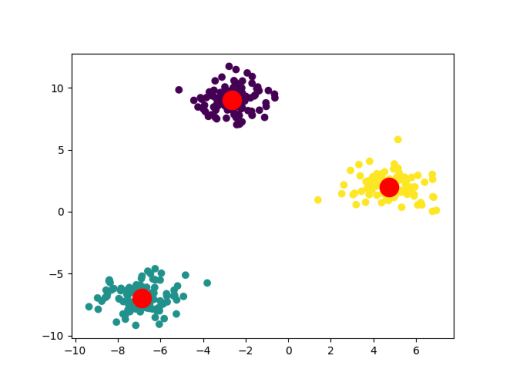

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from file
img = mpimg.imread('/content/cluster_plot.png')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
!python3 run.py


### Thought Process and Research

- **Algorithmic Understanding**: Before diving into coding, I ensure a strong grasp of the k-means algorithm, its applications, and its limitations. This foundational knowledge guides effective implementation and troubleshooting.

- **Practical Implementation**: The code is structured to reflect the iterative nature of k-means, with clear methods for initializing centroids, assigning clusters, and updating centroids. This modular approach aligns with good programming practices and makes the code more maintainable and testable.

- **Testing and Evaluation**: Implementing the algorithm from scratch allows for a deeper understanding but also requires thorough testing. I would test the algorithm on synthetic datasets (like those generated by `make_blobs`) to ensure it performs as expected.

- **Optimization and Robustness**: While the basic implementation is straightforward, real-world scenarios might require optimizations for efficiency and enhancements to handle edge cases, such as convergence criteria and handling empty clusters.

Approaching this problem involves balancing theoretical knowledge with practical implementation skills, ensuring the algorithm

#### Unit Testing - Debugging Algorithm

In [ ]:
import unittest
import numpy as np

class TestKMeans(unittest.TestCase):

    def test_initialize_centroids(self):
        # Mock data and parameters
        X = np.array([[1, 2], [3, 4], [5, 6]])
        k = 2
        random_state = 42
        model = KMeans(k=k, max_iters=100, random_state=random_state)

        # Action
        centroids = model.initialize_centroids(X)

        # Assert
        self.assertEqual(centroids.shape, (k, X.shape[1]))
        self.assertTrue(np.all([c in X for c in centroids]))  # Check if centroids are from X

    def test_compute_centroids(self):
        # Mock data, labels, and parameters
        X = np.array([[1, 2], [3, 4], [5, 6]])
        labels = np.array([0, 1, 1])
        k = 2
        expected_centroids = np.array([[1, 2], [4, 5]])  # Manually computed expected centroids
        model = KMeans(k=k, max_iters=100, random_state=42)
        model.centroids = np.zeros((k, X.shape[1]))

        # Action
        new_centroids = model.compute_centroids(X, labels)

        # Assert
        np.testing.assert_array_almost_equal(new_centroids, expected_centroids)

    def test_assign_clusters(self):
        # Mock data and centroids
        X = np.array([[1, 2], [3, 4], [6, 7]])
        centroids = np.array([[1, 2], [5, 6]])
        model = KMeans(k=2, max_iters=100, random_state=42)

        # Action
        labels = model.assign_clusters(X, centroids)

        # Assert
        expected_labels = np.array([0, 0, 1])
        np.testing.assert_array_equal(labels, expected_labels)

    def test_predict(self):
        # Assuming fit() works correctly, test predict with mock centroids
        X = np.array([[0, 0], [4, 4]])
        model = KMeans(k=2, max_iters=100, random_state=42)
        model.centroids = np.array([[1, 1], [3, 3]])

        # Action
        predictions = model.predict(X)

        # Assert
        expected_predictions = np.array([0, 1])
        np.testing.assert_array_equal(predictions, expected_predictions)

import unittest

# Assume your TestKMeans class is already defined here

def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestKMeans)
    unittest.TextTestRunner(verbosity=2).run(suite)

run_tests()


test_assign_clusters (__main__.TestKMeans) ... ok
test_compute_centroids (__main__.TestKMeans) ... ok
test_initialize_centroids (__main__.TestKMeans) ... ok
test_predict (__main__.TestKMeans) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.017s

OK


#### Understanding Broadcasting:

In [ ]:
X = np.array([[1, 2], [3, 4], [2, 1], [5, 1],[2, 2],[3, 3]])
centroids = np.array([[1, 0], [0, 1]])

# Reshape centroids for broadcasting
expanded_centroids = centroids[:, np.newaxis]  # shape becomes (2, 1, 2)
expanded_centroids
# # Broadcasting subtraction
diff = (X - centroids[:, np.newaxis])
  # resulting shape is (2, 2, 2)
# Compute squared distances and sum over features
squared_diff = np.square(diff)  # still (2, 2, 2)
summed_squared_diff = squared_diff.sum(axis=2)  # sum over features, shape is (2, 2) not centroids
# if summing axis=0, essentially we are summing the feature from centroids 0 to centroid 1
# what we want is summing the datapoint within its own centroids

squared_diff, np.mean(squared_diff[1], axis=0), summed_squared_diff
# # Compute the square root of the summed squared differences
# distances = np.sqrt(summed_squared_diff)  # final distances, shape is (2, 2)

# distances, np.argmin(distances, axis=0)

# # print('array([1, 1, 0, 0, 0, 0]) meaning that the first data point is closest to the first centroids and vice versa')
# print('(array([[2.        , 4.47213595, 1.41421356, 4.12310563, 2.23606798, \
#          3.60555128], \
#         [1.41421356, 4.24264069, 2.        , 5.        , 2.23606798, \
#          3.60555128]]) \n Interpretation: the first data point is 2. away from centroids 0 and 1.41 away from the first centroids \
#          \n so then that means the first data point is closer to centroids 1 than 0')

## Module 12

### K Nearest Neighbors

Solving a LeetCode problem that involves understanding and implementing the k-nearest neighbors (KNN) algorithm can be approached systematically. Here’s how I would tackle this task:

### Understanding K-Nearest Neighbors (KNN)

1. **Conceptual Overview**: KNN is a simple, yet powerful machine learning algorithm used for classification and regression. It works by finding the 'k' closest training examples in the feature space, and the output is determined by majority vote (for classification) or average (for regression) of these 'k' nearest neighbors.

2. **Choosing 'k'**: The choice of 'k' affects the algorithm significantly. A smaller 'k' can lead to noise having a higher influence on the result, while a larger 'k' makes the computation costlier and might include points that are too far away, leading to underfitting.

3. **Distance Metric**: Commonly, Euclidean distance is used, but depending on the problem, other metrics like Manhattan or Minkowski distance can be more appropriate.

4. **Feature Scaling**: It’s crucial to scale the features because KNN is distance-based, meaning it's sensitive to the magnitude of the features.

### Implementing KNN in Python

Here’s a simplified version of how I would implement KNN from scratch in Python, focusing on classification:



In [ ]:
%%writefile KNN.py
import numpy as np

# this function method convert a list into a hashable map
from collections import Counter

# remember x1 and x2 is an array where you will pair the addition and sum it in parralel

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

# now let's define the class that iterate the steps of an KNN algorithm
# first let define what we need in a KNN:
  # we need a method of fitting the data base on the number of k
  # we also need a method of predicting our fitted model

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  # this function is the object of array to hold the predicted value
  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  # now we need to define the actually prediction model
  def _predict(self, x):
    # calculate the distance between the point of interest to all other point in the dataset
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train] # return a list of value

    # sort the distance and select the lowest
    k_indices = np.argsort(distances)[:self.k] # sort the value into order then return the indices of corresponding to the value sorted

    # find the label that correst pond to the lowest distance
    # remember that k_indices is the indices of the k=n value
    k_nearest_labels = [self.y_train[i] for i in k_indices] # the i indices (k_indices) that has the lowest distance that point to the y_train

    # now create a hashable map where each value will have count values
    # most common value is x, appear y times
    most_common = Counter(k_nearest_labels).most_common(1)

    return most_common[0][0]






Writing KNN.py


In [ ]:
%%writefile run.py
if __name__ == "__main__":
  from sklearn.datasets import load_iris
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from KNN import KNN
  import numpy as np

  iris = load_iris()
  X, y = iris.data, iris.target

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test) # avoid data leakage top not use fit_transform, just standard scale the testing data

  n=1

  model = KNN(k=n)
  model.fit(X_train, y_train) # internally the data is just storing the training dataset

  predictions = model.predict(X_test) # the training of the model is actually happening here
  accuracy = np.mean(predictions == y_test)
  print(f"Accuracy: {accuracy}")


Overwriting run.py


In [ ]:
!python run.py

Accuracy: 0.9333333333333333


### Thought Process and Research

- **Algorithm Understanding**: Before coding, I ensure a solid understanding of KNN's mechanism, which helps in making informed decisions about key aspects like distance metrics and the value of 'k'.

- **Code Structuring**: I structure the code into clear, reusable components (like the `fit`, `predict`, and `_predict` methods), which aligns with good software engineering practices.

- **Testing and Evaluation**: After implementation, it's important to test the algorithm on a dataset (like Iris) to ensure it works as expected. This involves evaluating its accuracy and making adjustments if necessary.

- **Optimization Considerations**: While the above code is a basic implementation, in a real-world scenario, considerations around optimizing for large datasets, parallel processing, or even using specialized libraries like Scikit-learn’s KNN implementation might be necessary.

This approach balances understanding the fundamental concepts, applying them in code, and ensuring the implementation is sound through testing and evaluation.

# Problem Solving

Let's design a LeetCode-style problem that incorporates the K-Nearest Neighbors (KNN) algorithm, following the format and details similar to the 3Sum problem but tailored to a scenario where KNN could be applied.

### LeetCode Problem: K-Nearest Stars

#### Difficulty: Medium

#### Topics: Arrays, Sorting, K-Nearest Neighbors

#### Companies: This type of question could be relevant for companies focusing on data science, machine learning, or astronomy-related software.

#### Hint
Consider utilizing a sorting algorithm to order stars by their distance from Earth. Then, apply the KNN concept to find the 'k' stars closest to the provided coordinates, ensuring no duplicate stars are included in the results.

#### Problem Description

Given an array `stars` representing the coordinates of stars in space (where each star is represented as a point `[x, y, z]` in 3D space), and an array `coordinates` representing the coordinates of a point in space, return the 'k' stars closest to the given point. Each element in `stars` is unique.

The distance between two points `[x1, y1, z1]` and `[x2, y2, z2]` is given by the Euclidean distance formula. The answer should be returned as an array of integer indices of the 'k' closest stars in the original list, sorted in ascending order of their distances from the given point. If two stars are equidistant, prioritize the star with the lower index.

#### Examples

**Example 1:**

- Input: stars = [[0,0,0], [1,2,3], [3,2,1]], coordinates = [1,1,1], k = 2
- Output: [0, 2]
- Explanation:
   - The distances of the stars from the point [1,1,1] are [1.732, 2.236, 1.732] respectively.
   - The two closest stars are at indices 0 and 2.

**Example 2:**

- Input: stars = [[1,1,1], [2,2,2], [3,3,3], [4,4,4]], coordinates = [1,0,0], k = 3
- Output: [0, 1, 2]
- Explanation:
   - The stars closest to the point [1,0,0] are the first three stars in the array.

#### Constraints:

- \( 1 <= k <= \text{len(stars)} <= 5000 \)
- \( -10^5 <= x, y, z <= 10^5 \)
- All `stars[i]` are unique.
- `coordinates` is a 3-element array representing a point in 3D space.

---

#### Implementing KNN for the Problem

The provided KNN class could be adapted to solve this problem by modifying it to work with 3D points instead of the 2D or multidimensional points typically used in standard datasets. The Euclidean distance calculation would remain the same, as it naturally extends to any number of dimensions. The `fit` method would not change, while the `predict` method would be repurposed to sort the stars by their distance to the `coordinates` and return the indices of the 'k' nearest ones.

This problem is a good test of understanding both KNN and how to manipulate data structures and apply sorting algorithms in a programming context, typical of what might be expected in a coding interview focusing on machine learning or data manipulation tasks.

# K Means Problem

Creating a LeetCode-style problem that involves understanding and implementing a k-means clustering algorithm offers an interesting twist. Here’s a structured approach to formulating such a problem:

### LeetCode Problem: Cluster Colors

#### Difficulty: Medium

#### Topics: Arrays, Clustering, K-Means

#### Hint
To solve this problem, consider implementing the k-means clustering algorithm to group colors based on their similarity. Remember, the algorithm involves initializing k centroids, assigning points (colors) to the nearest centroids, recalculating centroids, and repeating the process until convergence.

#### Problem Description

Given an array `colors` where each `color` is represented as `[R, G, B]` indicating the Red, Green, and Blue components of a color, implement the k-means clustering algorithm to classify the colors into `k` clusters based on their similarity in RGB color space. Return the array `clusters` containing `k` arrays, each representing a cluster of colors.

#### Examples

**Example 1:**

- Input: colors = [[255,0,0], [0,255,0], [0,0,255], [255,255,0]], k = 2
- Output: [[[255, 0, 0], [255, 255, 0]], [[0, 255, 0], [0, 0, 255]]]
- Explanation:
   - The colors are clustered into two groups: one with red and yellow (similar because of the high red component), and another with green and blue.

**Example 2:**

- Input: colors = [[100,100,100], [200,200,200], [150,150,150]], k = 2
- Output: [[[100, 100, 100], [150, 150, 150]], [[200, 200, 200]]]
- Explanation:
   - The colors are clustered based on their brightness, resulting in two clusters.

#### Constraints:

- \( 1 <= k <= \text{len(colors)} \)
- \( 0 <= R, G, B <= 255 \)
- Each `color` in `colors` is unique.

#### Note
For the sake of simplicity in a coding interview scenario, you may assume that the k-means algorithm's initialization step selects the first `k` unique colors as the initial centroids. This modification is to avoid the complexity of random selection which might require additional explanations during an interview.

---

This problem statement encourages candidates to apply the k-means clustering algorithm in a slightly unconventional domain (color space clustering) while still requiring the foundational understanding of how k-means works. The focus on RGB color space provides a tangible, visual context for the algorithm's application, making it an engaging and instructional challenge.